<a href="https://colab.research.google.com/github/GECarlo/CodingDojo/blob/main/Project_1_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
# mount drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [228]:
# import file
filename = '/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv'
df = pd.read_csv(filename)

In [229]:
# how many rows and columns
df.shape

(8523, 12)

In [230]:
# what are the datatypes of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [247]:
# are there duplicates? if so drop them
df.duplicated()

# drop duplicates
df.drop_duplicates(inplace = True)

In [232]:
# identify the missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

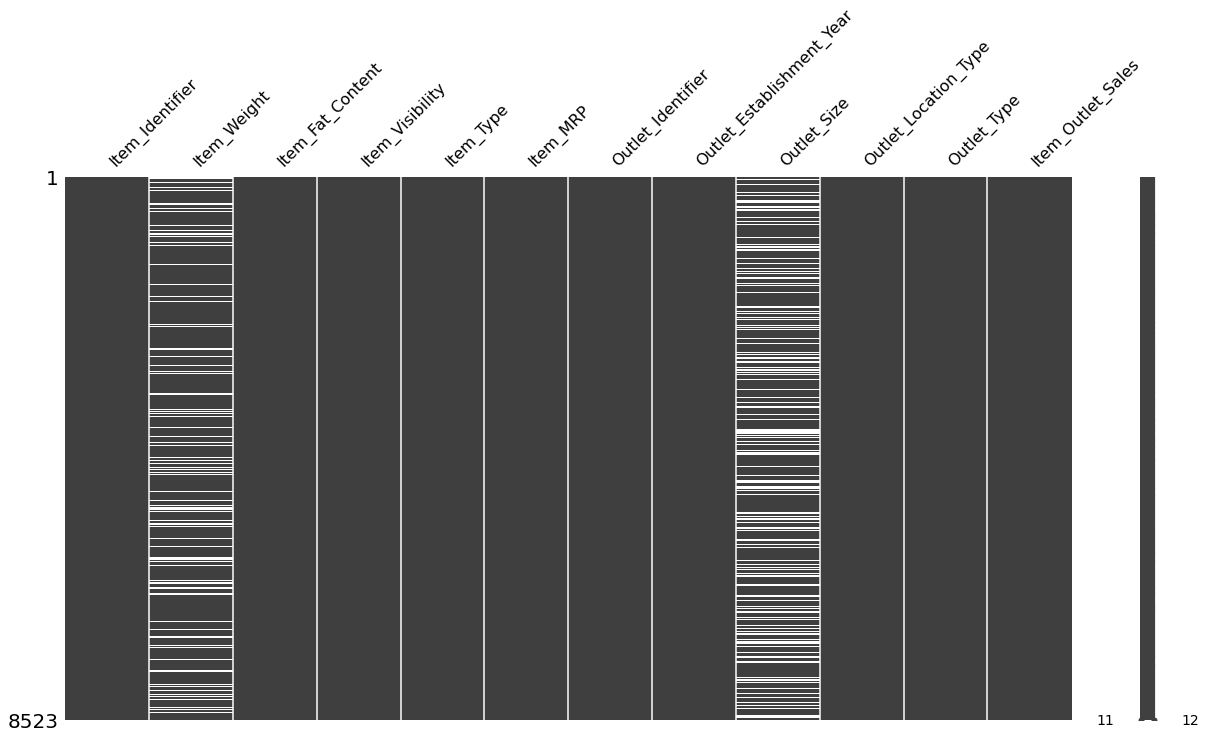

In [233]:
# use missingno to plot where the missing values are
missingno.matrix(df, figsize = (20, 10));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


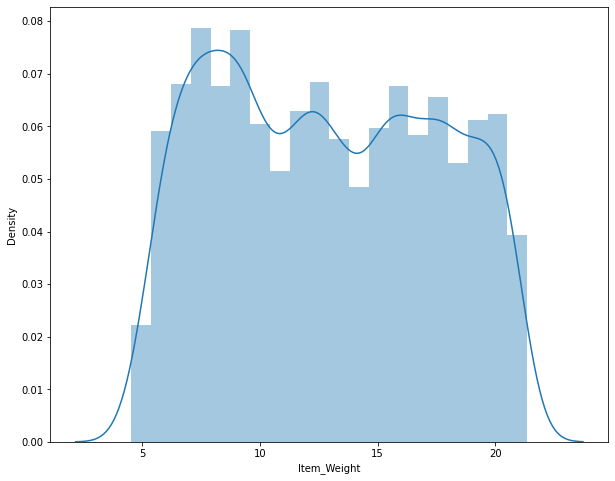

In [234]:
# decide how to address the missing values and do it. (this requires your judgement so explain your choice) 
# show plot of df with missing values as a point of reference to observe skewness
x = df['Item_Weight']
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(x);

In [235]:
# using mode to fill missing item_weight
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mode()[0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


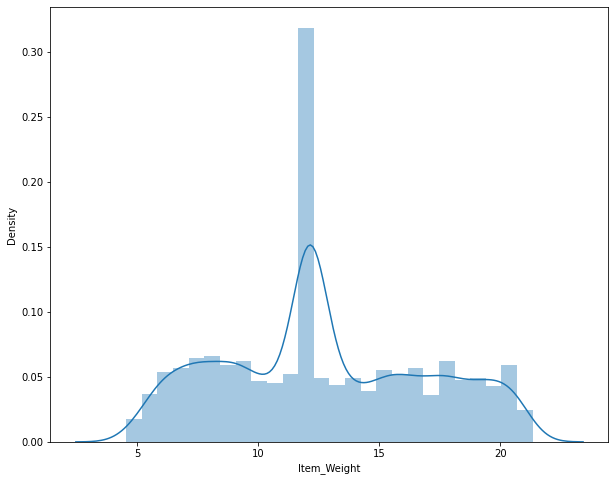

In [236]:
# testing for skewness vs df with missing values
x = df['Item_Weight']
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(x);

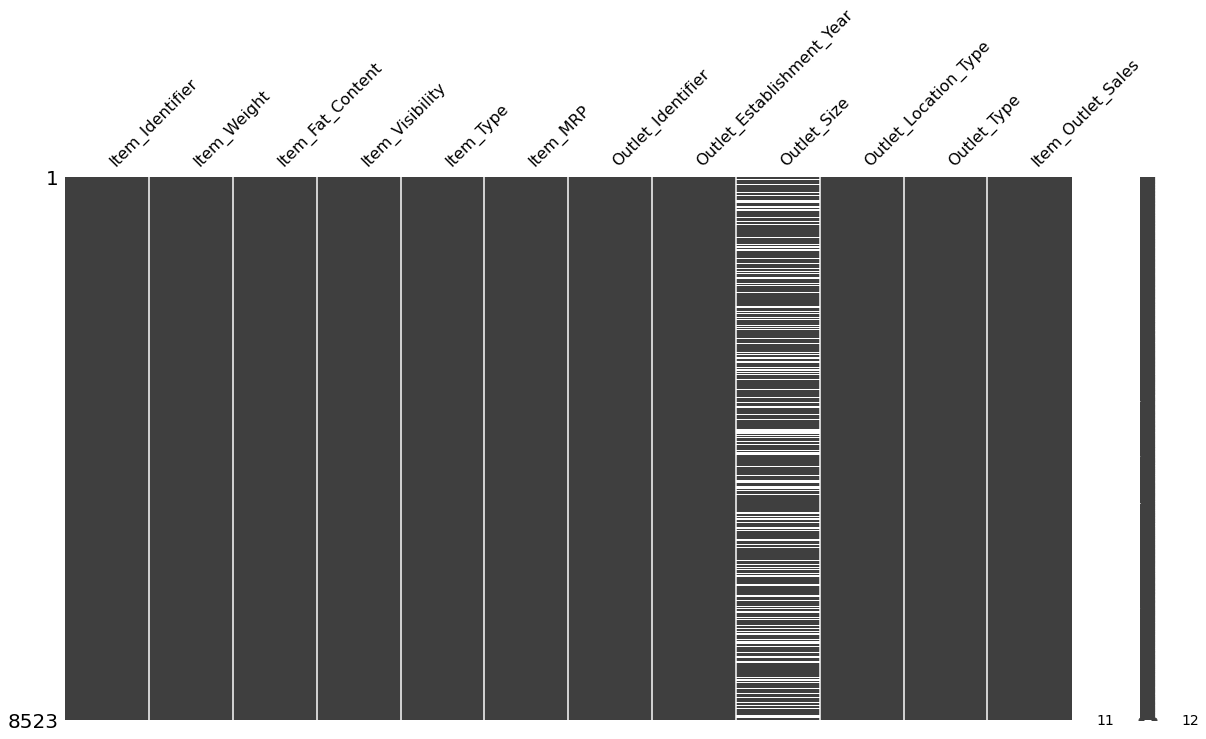

In [237]:
# confirm that there are no missing values after addressing them
missingno.matrix(df, figsize = (20, 10));

In [238]:
# using mean to fill missing item_weight
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


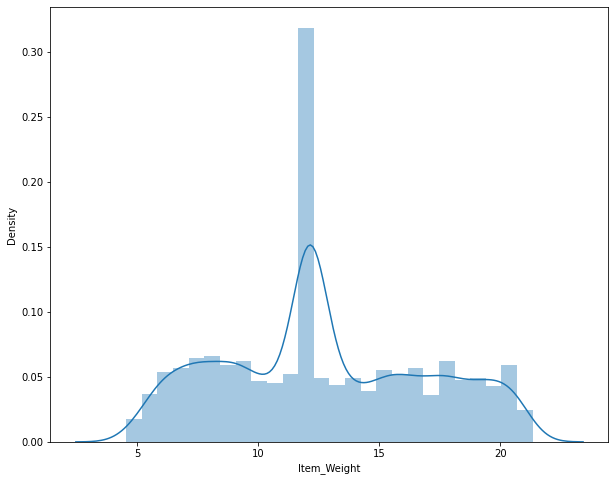

In [239]:
# testing for skewness vs df with missing values
x = df['Item_Weight']
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(x);

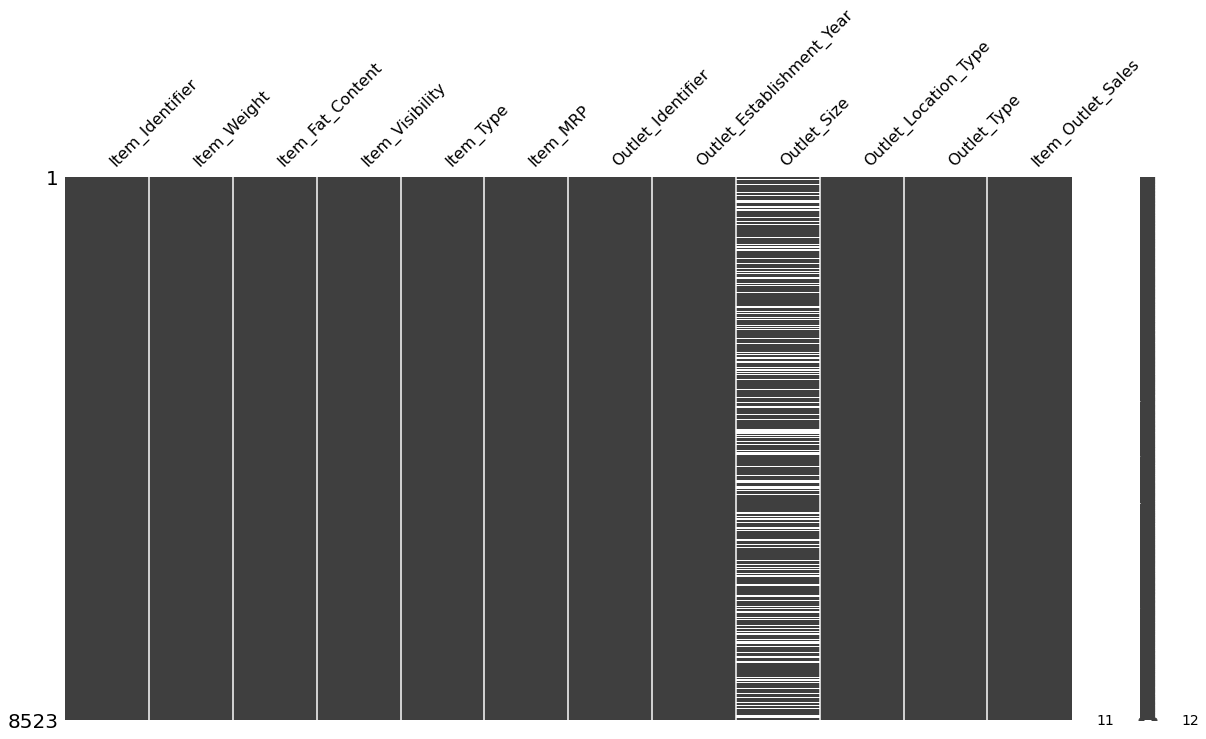

In [240]:
# confirm that there are no missing values after addressing them
missingno.matrix(df, figsize = (20, 10));

In [241]:
# using median to fill missing item_weight
df = df.fillna(df.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


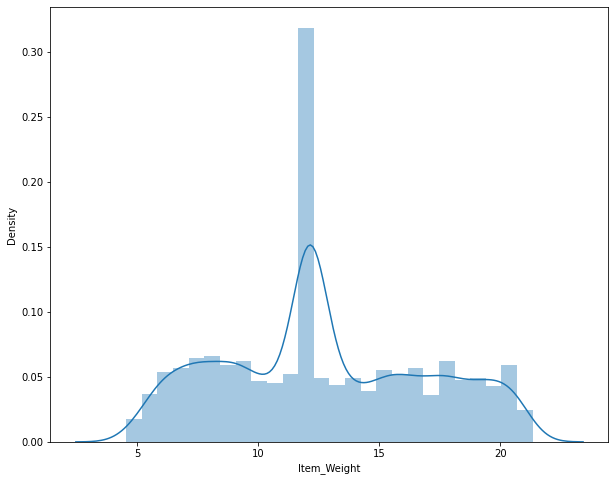

In [242]:
# testing for skewness vs df with missing values
x = df['Item_Weight']
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(x);

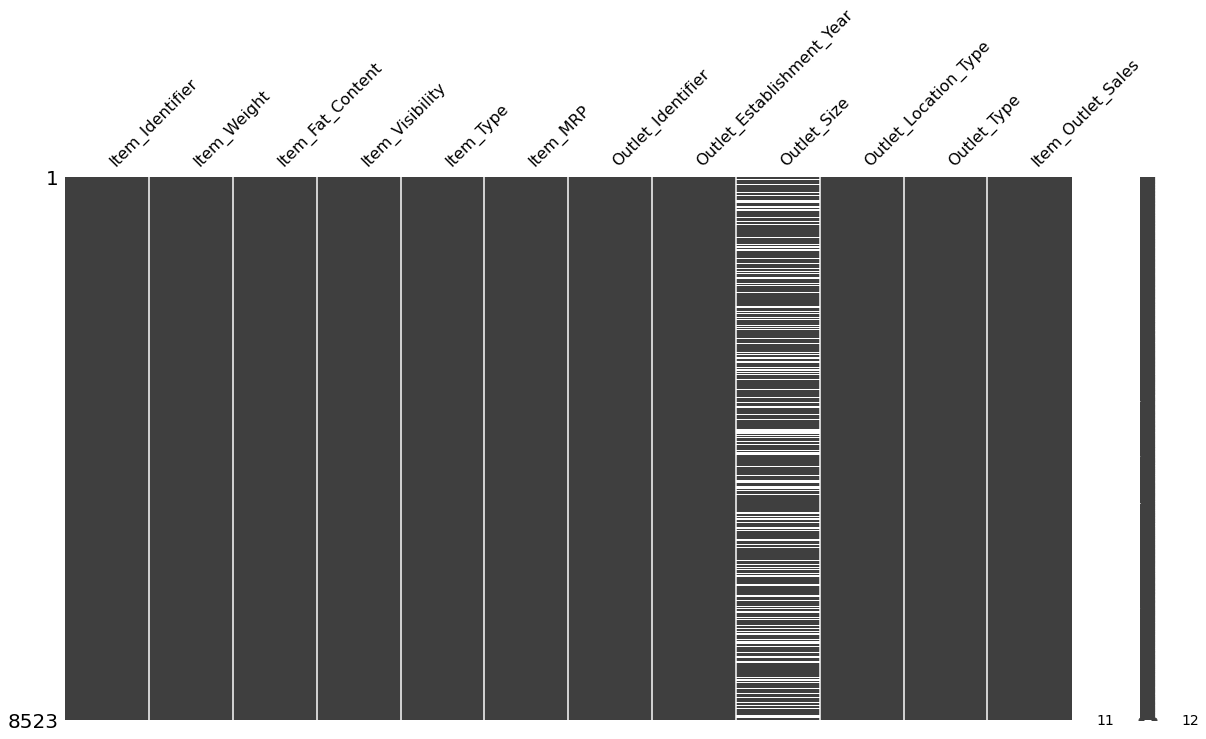

In [243]:
# confirm that there are no missing values after addressing them
missingno.matrix(df, figsize = (20, 10));

In [244]:
# decide how to address the missing values and do it. (this requires your judgement so explain your choice)
# having tested the skewness of the data when using mean, median, and mode vs the original dataset
# this suggests that filling the data will have a significant impact in its skewness. Hence, it is recommended that Item_Weight be not used
df.drop('Item_Weight', inplace = True, axis = 1)
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [266]:
# find and fix any inconsistent categories of data (Cat > cat to make sure they are consistent)
for columns in df:
  print(df[columns].value_counts())

# Item_Fat_Content has inconsistent names (LF, low fat, reg)

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int

In [265]:
# create for loop to replace inconsistent names low fat
new_name = {}

for name in df['Item_Fat_Content']:
  new = name.replace('low fat', 'Low Fat')
  new_name[name] = new

df.replace({'Item_Fat_Content': new_name}, inplace = True)

In [ ]:
# create for loop to replace inconsistent names LF
new_name = {}

for name in df['Item_Fat_Content']:
  new = name.replace('LF', 'Low Fat')
  new_name[name] = new

df.replace({'Item_Fat_Content': new_name}, inplace = True)

In [270]:
# create for loop to replace inconsistent names reg
new_name = {}

for name in df['Item_Fat_Content']:
  new = name.replace('reg', 'Regular')
  new_name[name] = new

df.replace({'Item_Fat_Content': new_name}, inplace = True)

In [283]:
# check for inconsistent names again
for columns in df:
  print(df['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [285]:
# for any numerical column, obtain the summary statistics of each (min, max, mean)
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800
